In [1]:
import time
start_time = time.time();

#Importing Libraries
import numpy as np

import tensorflow as tf
import matplotlib.pyplot as plt


In [2]:
!pip install -q tensorflow-hub
!pip install -q tfds-nightly
import tensorflow_hub as hub
import tensorflow_datasets as tfds

Download the IMDB dataset

In [3]:
# Split the training set into 60% and 40%, so we'll end up with 15,000 examples for training, 
# 10,000 examples for validation and 25,000 examples for testing.
train_data, validation_data, test_data = tfds.load(
    name="imdb_reviews", 
    split=('train[:70%]', 'train[70%:]', 'test'),
    as_supervised=True)

Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteNLQ447/imdb_reviews-train.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteNLQ447/imdb_reviews-test.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteNLQ447/imdb_reviews-unsupervised.tfrecord


Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0. Subsequent calls will reuse this data.


In [4]:
train_examples_batch, train_labels_batch = next(iter(train_data.batch(10)))

In [5]:
train_labels_batch

<tf.Tensor: shape=(10,), dtype=int64, numpy=array([0, 0, 0, 1, 1, 1, 0, 0, 0, 0])>

In [6]:
embedding = "https://tfhub.dev/google/tf2-preview/gnews-swivel-20dim/1"
hub_layer = hub.KerasLayer(embedding, input_shape=[], 
                           dtype=tf.string, trainable=True)
hub_layer(train_examples_batch[:3])

<tf.Tensor: shape=(3, 20), dtype=float32, numpy=
array([[ 1.765786  , -3.882232  ,  3.9134233 , -1.5557289 , -3.3362343 ,
        -1.7357955 , -1.9954445 ,  1.2989551 ,  5.081598  , -1.1041286 ,
        -2.0503852 , -0.72675157, -0.65675956,  0.24436149, -3.7208383 ,
         2.0954835 ,  2.2969332 , -2.0689783 , -2.9489717 , -1.1315987 ],
       [ 1.8804485 , -2.5852382 ,  3.4066997 ,  1.0982676 , -4.056685  ,
        -4.891284  , -2.785554  ,  1.3874227 ,  3.8476458 , -0.9256538 ,
        -1.896706  ,  1.2113281 ,  0.11474707,  0.76209456, -4.8791065 ,
         2.906149  ,  4.7087674 , -2.3652055 , -3.5015898 , -1.6390051 ],
       [ 0.71152234, -0.6353217 ,  1.7385626 , -1.1168286 , -0.5451594 ,
        -1.1808156 ,  0.09504455,  1.4653089 ,  0.66059524,  0.79308075,
        -2.2268345 ,  0.07446612, -1.4075904 , -0.70645386, -1.907037  ,
         1.4419787 ,  1.9551861 , -0.42660055, -2.8022065 ,  0.43727064]],
      dtype=float32)>

In [7]:
model = tf.keras.Sequential()
model.add(hub_layer)
model.add(tf.keras.layers.Dense(16, activation='relu'))
model.add(tf.keras.layers.Dense(1))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer (KerasLayer)     (None, 20)                400020    
_________________________________________________________________
dense (Dense)                (None, 16)                336       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 17        
Total params: 400,373
Trainable params: 400,373
Non-trainable params: 0
_________________________________________________________________


In [8]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [9]:
history = model.fit(train_data.shuffle(10000).batch(512),
                    epochs=20, validation_data=validation_data.batch(512), verbose=1)

Epoch 1/20
35/35 [==============================] - 3s 91ms/step - loss: 0.7396 - accuracy: 0.5750 - val_loss: 0.6410 - val_accuracy: 0.6287
Epoch 2/20
35/35 [==============================] - 3s 86ms/step - loss: 0.6101 - accuracy: 0.6435 - val_loss: 0.5881 - val_accuracy: 0.6587
Epoch 3/20
35/35 [==============================] - 3s 84ms/step - loss: 0.5607 - accuracy: 0.6850 - val_loss: 0.5469 - val_accuracy: 0.6956
Epoch 4/20
35/35 [==============================] - 3s 85ms/step - loss: 0.5175 - accuracy: 0.7227 - val_loss: 0.5100 - val_accuracy: 0.7396
Epoch 5/20
35/35 [==============================] - 3s 86ms/step - loss: 0.4762 - accuracy: 0.7619 - val_loss: 0.4745 - val_accuracy: 0.7484
Epoch 6/20
35/35 [==============================] - 3s 85ms/step - loss: 0.4364 - accuracy: 0.7903 - val_loss: 0.4406 - val_accuracy: 0.7791
Epoch 7/20
35/35 [==============================] - 3s 86ms/step - loss: 0.3987 - accuracy: 0.8154 - val_loss: 0.4104 - val_accuracy: 0.8017
Epoch 8/20
35

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


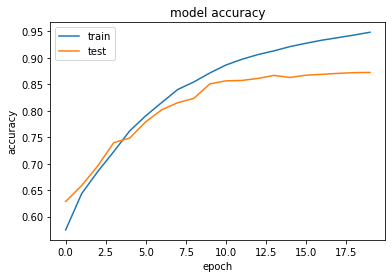

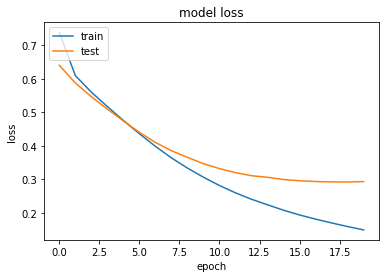

In [12]:
import matplotlib.pyplot as plt
import numpy as np

# List all data in history
print(history.history.keys())

# Summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()